

#Introducción


La optimización matemática es una herramienta que se puede aplicar en cualquier ámbito para el cual se busquen soluciones acotadas por ciertas restricciones y  que cumplan un objetivo, al resolver un problema comúnmente se busca la mejor solución, esto puede significar buscar el parámetro que maximiza o minimiza un modelo planteado previamente, específicamente cuando dichos modelos son convexos (dependen de funciones convexas), se entra al campo de la optimización convexa, en el cual suele ser mucho más fácil encontrar la solución y que por tanto es el que comúnmente  buscamos utilizar al tener un problema con ciertas características. 

A continuación vamos a plantear y resolver un problema específico de optimización convexa, en el cual el objetivo es la reconstrucción de una imagen (caracterizada por una matriz), a partir de otra imagen dada, modificando aspectos como la iluminación y el contraste de la imagen. Más concretamente, deseamos eliminar la influencia de ciertos aspectos que aparecen en una imagen al momento de su captura, y así mejorar su calidad.

Al momento de capturar una imagen diversos factores influyen en el resultado de esta, factores como nubosidad, humedad, iluminación, distribución de transmisión de la luz atmosférica,  calidad del dispositivo donde se está capturando la imagen, entre otros.

Teniendo en cuenta los diferentes factores que alteran la imagen se buscará cómo recuperar la imagen que representa la escena mediante optimización convexa.




#¿Por qué es un problema inverso?,¿Por qué es un problema de optimización convexa?

Un problema inverso se puede entender como la reconstrucción de cierto objeto, a partir de un objeto dado inicialmente. El objeto inicial se puede caracterizar con una matriz, y con la ayuda de ciertos parámetros iniciales relacionados al objetivo, se intenta obtener el objeto deseado, que sería una segunda matriz. Se le llama problema inverso, porque en él se trata al objeto deseado como una matriz que ha sido modificada por esos parámetros, y debido a eso se obtiene la matriz con la que iniciamos, de lo que se trata es de invertir esa modificación para obtener la matriz “original”.

Daremos como ejemplo de un problema inverso el modelo utilizado para la reconstrucción de imágenes, o para desempañar imágenes, el cual se puede ver como un problema de optimización convexa. En general, los problemas inversos se pueden plantear bajo la forma de una optimización convexa, pues la ecuación que plantea la relación entre la matriz inicial y la matriz modificada, es una ecuación lineal respecto a estas matrices (como se verá más adelante). Esto nos permite solucionar mucho más fácilmente el problema como un problema de optimización.

#Explicación del modelo

El modelo que nosotros usaremos, con el cual se busca reconstruir una imagen que está borrosa o que tiene neblina,  está dado por:

$$I_c=J_c⊙t+a_c(1-t), \hspace{0.5cm}c=1,2,3$$

En donde  $I_c$ e  $J_c$ son matrices cuyas componentes serán los píxeles de la imagen con neblina y sin neblina respectivamente, este modelo plantea que cada pixel de la imagen con neblina es una combinación convexa entre la imagen sin neblina y una constante  $a_c$(que varía sólo según la imagen de cada caso) que depende de la iluminación, es decir, cada pixel está conformado en parte por el pixel que queremos recuperar y la influencia que tiene la luz atmosférica sobre este, es claro que en todos los píxeles está combinación no es igual, luego aunque tenemos la restricción $0 < t < 1$ , se tiene que este parámetro $t$  es distinto para cada uno de los pixeles y por tanto podemos plantear a $t$ como función de cada uno de ellos.

Ahora, teniendo en cuenta que uno de los efectos de la niebla es precisamente un decaimiento exponencial de la intensidad del color y la luz,  se toma 
$$t(x)=e^{-βd(x)}$$
Siendo $d(x)$ la distancia o profundidad de los objetos a la cámara y $β$ una constante que indica que tanto influye la neblina en la observación de los objetos a cierta profundidad, luego  los efectos de tener un $t$ pequeño para algún píxel en la imagen sobre la matriz $I_c$ es precisamente una pérdida del contraste y de la visibilidad de los objetos en la escena.

Teniendo en cuenta el modelo descrito, para hallar la matriz $J_c$ es necesaria la previa  estimación de la constante atmosférica  $a_c$, la cual cambia según la imagen y que  a menudo se estima tomando la región más opaca que se encuentre en la imagen, en este caso la que tenga más neblina.


Observación: En este proyecto se va a trabajar con imágenes en escala de grises, luego evitamos escribir $c$  como representación de la indexación RGB.

#Contextualización del problema

En principio, la resolución del problema inverso para la reconstrucción de imágenes, es sólo un caso particular de una gran cantidad de problemas que se pueden plantear como una combinación convexa similar a la que se muestra arriba como modelo. Gracias a qué, como se ha dicho, una imagen digital se puede caracterizar mediante una matriz para los fines propuestos, podemos usar ese modelo de combinación convexa para resolver este problema.

Dentro del dominio de los problemas de reconstrucción de imágenes, hay igualmente gran diversidad de aplicaciones particulares. Se puede utilizar para mejorar la calidad de una imagen que haya quedado muy borrosa; para diferenciar los píxeles de una imagen, y en general para modificar ciertos detalles globales de una imagen y así eliminar posibles imperfecciones.

Específicamente, nuestro contexto será el de la utilización de la reconstrucción de imágenes como una herramienta para los automóviles autónomos. Aunque nuestra intención no es trabajar directamente con ese campo, lo que queremos es sugerir la utilidad de cierto modelo para que sea aplicado, por ejemplo, en ese contexto. En cualquier caso, no se trataría de una aplicación por completo extraña a lo que nos proponemos en este proyecto, porque parte del proceso que realizaremos tiene cierta continuidad con lo que es relevante para el manejo de un automóvil autónomo. Piénsese por ejemplo en la importancia de determinar la distancia a ciertos objetos cercanos, desde el automóvil.

#¿Por qué es útil solucionar el problema de reconstrucción de imágenes?

Es importante resolver el problema de reconstrucción de imágenes ya que muchas veces al capturar una imagen, esta se puede dañar por el movimiento, bien sea de quien capturó el momento, o por el movimiento en el ambiente. La imagen también se puede ver afectada por la calidad del dispositivo, factores ambientales como nubosidad, humedad, incidencia de la luz atmosférica, etc, estos factores desvanecen los colores y reducen el contraste de los objetos capturados. Al quitar todo lo que deteriora la imagen y obteniendo como salida del problema una imagen clara y nítida, podemos obtener mucha información de suma importancia. En muchas áreas es importante tener una imagen clara para obtener información; como sucede en la medicina, astronomía, meteorología, etc. Es por eso que solucionar este problema es útil y ayudaría a diferentes aplicaciones en la actualidad.

#Librerías a usar

Vamos a usar las siguientes librerías de Python:

$\bullet$ cv2: También conocida como OpenCV es una librería para visión artificial de código abierto.

$\bullet$ PIL: (Python Imaging Library) Es una librería que permite la edición de imágenes directamente desde Python.

$\bullet$ numpy: Esta librería es especializada en el cálculo numérico y el análisis de datos


#Código

El código a implementar...

# Nuestro Código

In [ ]:
!pip install cvxpy
!pip install image_dehazer
!pip install numpy==1.19.0
!pip install opencv-python
!pip install scipy
!pip install Pillow

In [3]:
#Importamos las librerías necesarias
from PIL import Image
from numpy import asarray

#Leemos la imagen y la transformamos como un array de Numpy
picture = Image.open('foto-niebla.jpg')
array_picture =  asarray(picture)
print(picture.mode)

RGB


In [4]:
#Calculamos A para encontrar la luz del aire
import cv2
import copy
import numpy as np
import matplotlib.pyplot as plt

def Airlight(HazeImg, windowSize):
    A = []
    for ch in range(len(HazeImg.shape)):
      kernel = np.ones((windowSize, windowSize), np.uint8)
      minImg = cv2.erode(HazeImg[:, :, ch], kernel)
      A.append(int(minImg.max()))
      # B.append(int(HazeImg[:, :, ch].max()))
    return(A)

In [32]:
import cv2
import numpy as np
def BoundCon(HazeImg, A, C0, C1, windowSze):
    t_b = np.maximum((A[0] - HazeImg[:, :, 0].astype(np.float)) / (A[0] - C0),
                      (HazeImg[:, :, 0].astype(np.float) - A[0]) / (C1 - A[0]))
    t_g = np.maximum((A[1] - HazeImg[:, :, 1].astype(np.float)) / (A[1] - C0),
                      (HazeImg[:, :, 1].astype(np.float) - A[1]) / (C1 - A[1]))
    t_r = np.maximum((A[2] - HazeImg[:, :, 2].astype(np.float)) / (A[2] - C0),
                      (HazeImg[:, :, 2].astype(np.float) - A[2]) / (C1 - A[2]))

    MaxVal = np.maximum(t_b, t_g, t_r)
    transmission = np.minimum(MaxVal, 1)
    # kernel = np.ones((windowSze, windowSze), np.float)
    # transmission = cv2.morphologyEx(transmission, cv2.MORPH_CLOSE, kernel=kernel)
    return(transmission)

In [6]:
def removeHaze(HazeImg, Transmission, A, delta):
    epsilon = 0.0001
    Transmission = pow(np.maximum(abs(Transmission), epsilon), delta)
    HazeCorrectedImage = copy.deepcopy(HazeImg)
    for ch in range(len(HazeImg.shape)):
        temp = ((HazeImg[:, :, ch].astype(float) - A[ch]) / Transmission) + A[ch]
        temp = np.maximum(np.minimum(temp, 255), 0)
        HazeCorrectedImage[:, :, ch] = temp    
    return(HazeCorrectedImage)

In [43]:
import cvxpy as cp
import numpy as np

def remove_haze(HazeImg,Transmission, A, delta):
    print("remove_haze")
    epsilon = 0.0001
    Transmission = pow(np.maximum(abs(Transmission), epsilon), delta)
    HazeCorrectedImage = copy.deepcopy(HazeImg)
    for ch in range(len(HazeImg.shape)):
        I_c = cp.Parameter(HazeImg[:, :, ch].shape)
        I_c.value = HazeImg[:, :, ch]
        J_c = cp.Variable(HazeCorrectedImage[:, :, ch].shape)
        J_c.value = HazeCorrectedImage[:, :, ch]
        t_c = cp.Parameter(Transmission.shape)
        t_c.value = Transmission
        a_c = cp.Parameter()
        a_c.value = A[ch]
        lambda_1 = 10
        lambda_2 = 20
        lambda_3 = 30        
        expression = I_c-(cp.multiply(J_c,t_c) + a_c*(1-t_c))
        objective = cp.Minimize(cp.sum_squares(expression))
        constraints = [0 <= J_c, J_c <= 255]
        prob = cp.Problem(objective, constraints)        
        prob.solve()

        temp=J_c.value
        print("Optimal value", prob.solve())
        print("Shape:",temp.shape )
        # temp = ((HazeImg[:, :, ch].astype(float) - A[ch]) / Transmission) + A[ch]
        temp = np.maximum(np.minimum(temp, 255), 0)
        HazeCorrectedImage[:, :, ch] = temp    
    return(HazeCorrectedImage)    

In [82]:
import cvxpy as cp
import numpy as np
from cvxpy.atoms.norm1 import norm1
from cvxpy.atoms.pnorm import pnorm

def remove_haze2(HazeImg,Transmission, A, delta):
    print("remove_haze2")
    epsilon = 0.0001
    Transmission = pow(np.maximum(abs(Transmission), epsilon), delta)
    HazeCorrectedImage = copy.deepcopy(HazeImg)
    for ch in range(len(HazeImg.shape)):
        I_c = cp.Parameter(HazeImg[:, :, ch].shape)
        I_c.value = HazeImg[:, :, ch]
        J_c = cp.Variable(HazeCorrectedImage[:, :, ch].shape)
        J_c.value = HazeCorrectedImage[:, :, ch]
        t_c = cp.Parameter(Transmission.shape)
        t_c.value = Transmission
        a_c = cp.Parameter()
        a_c.value = A[ch]
        lambda_1 = 0.1
        lambda_2 = 20
        lambda_3 = 30        
#         expression = I_c-(cp.multiply(J_c,t_c) + a_c*(1-t_c))+(lambda_1*(cp.norm(t_c,p=2).value))
        expression = I_c-(cp.multiply(J_c,t_c) + a_c*(1-t_c))
        objective = cp.Minimize(cp.norm1(expression))
        constraints = [0 <= J_c, J_c <= 255]
        prob = cp.Problem(objective, constraints)        
        prob.solve()

        temp=J_c.value
        print("Optimal value", prob.solve())
        print("Shape:",temp.shape )
        # temp = ((HazeImg[:, :, ch].astype(float) - A[ch]) / Transmission) + A[ch]
        temp = np.maximum(np.minimum(temp, 255), 0)
        HazeCorrectedImage[:, :, ch] = temp    
    return(HazeCorrectedImage)   

(716, 1000, 3)
remove_haze
Optimal value 280778.5113490545
Shape: (716, 1000)
Optimal value 576350.8530954013
Shape: (716, 1000)
Optimal value 1527124.6600482375
Shape: (716, 1000)
remove_haze2
Optimal value 28025.905377892377
Shape: (716, 1000)
Optimal value 53670.14882021671
Shape: (716, 1000)
Optimal value 105865.63703515257
Shape: (716, 1000)


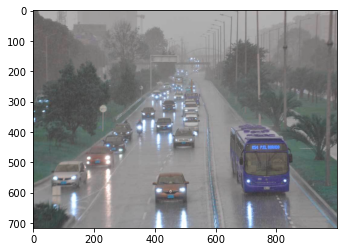

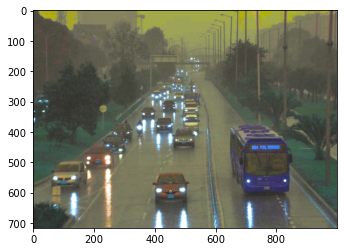

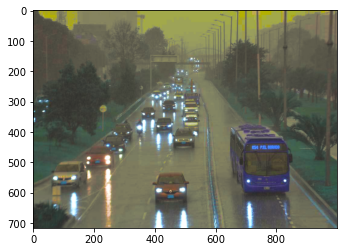

True

In [83]:
from PIL import Image
from matplotlib import cm
HazeImg = cv2.imread('transmi.jpg')	

print(HazeImg.shape)

# Estimate Airlight
windowSze = 25
windowSize = 3
A = Airlight(HazeImg, windowSze)
C0=20
C1=300
t = BoundCon(HazeImg,A,C0,C1,windowSize)
t1 = t*1
# HazeCorrectedImg = removeHaze(HazeImg, t1, A,0.4)
test = remove_haze(HazeImg, t1, A,0.4)
test2 = remove_haze2(HazeImg, t1, A,0.4)
# plt.imshow(HazeImg)
# plt.show()
# plt.imshow(HazeCorrectedImg)
# plt.show()
# print("--------------------------------------")
plt.imshow(HazeImg)
plt.show()
plt.imshow(test)
plt.show()
plt.imshow(test2)
plt.show()
cv2.imwrite('HazeImg.png',HazeImg)
cv2.imwrite('Test.png',test)
cv2.imwrite('Test2.png',test2)
cv2.imwrite('Dehaze.png',HazeCorrectedImg)

#Ejemplos de resultados

Ejecutamos el siguiente código para ver un ejemplo de como funciona el problema de reconstrucción de imágenes.
Se presenta una imagen de la ciudad de Bogotá en un día nublado y lluvioso.

#Conclusiónes

En este trabajo...

#Referencias

https://github.com/Utkarsh-Deshmukh/Single-Image-Dehazing-Python/blob/master/src/removeHaze.py

https://www.cv-foundation.org/openaccess/content_iccv_2013/papers/Meng_Efficient_Image_Dehazing_2013_ICCV_paper.pdf

https://www.researchgate.net/publication/307516271_Convex_optimization_for_fast_image_dehazing 

https://www.researchgate.net/publication/221110862_Fast_Visibility_Restoration_from_a_Single_Color_or_Gray_Level_Image

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8323906/